## Problem : Predict the compressive strength of concrete

In [2]:
# LINEAR REGRESSION IN PYTHON
#------------------LINEAR REGRESSION-----------------------------------------------------------------
# Import library pandas
import numpy as np
import pandas as pd
import seaborn as sns
import os
#import statsmodels.formula.api as sm
from statsmodels.api import add_constant
# import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set_style('darkgrid')

# Cement strength data set

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable ( +ve )                                          
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable - used for water retaining (+ve)                             
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable  - Add final strength and increase its chemical resistance and durability - (-ve)                                         
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable   (-ve)                                         
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable   - It does not imparts air inside concrete unlike plasticizers. It is responsible for both strength gain and improvement in work ability - (+ve)                           
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable - Coarse aggregates are particles greater than the size 4.75mm - (-ve)                               
Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable   - fine aggregates are so small in size that they can pass through 9 mm sieve. (-ve)

Age -- quantitative  -- Input Variable (+ve)                                                                 
Concrete compressive strength -- quantitative -- MPa -- Output Variable                                                

In [3]:
## Set working directory

os.chdir('D:\Reg')

In [3]:
data_con=pd.read_csv('Concrete_Data.csv')
data_con.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data_con.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


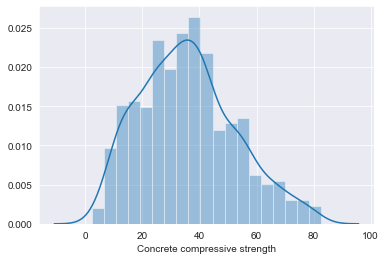

In [5]:
## check if dependent variable is normally distributed or not
sns.distplot(data_con['Concrete compressive strength'])
plt.show()

# Split the data in DV and IVs

In [6]:
#data1 = data.loc[:,['medv','lstat']]
# split the data into indepdent and dependent feature set
X = data_con[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water','Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']]
Y = data_con['Concrete compressive strength']

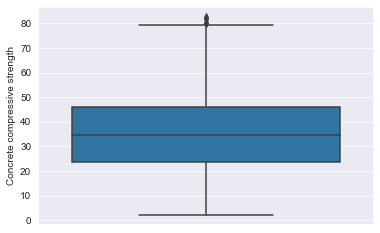

In [7]:
# let's look at the spread of the dependent variable
sns.boxplot(data_con['Concrete compressive strength'],orient='v')
plt.show()

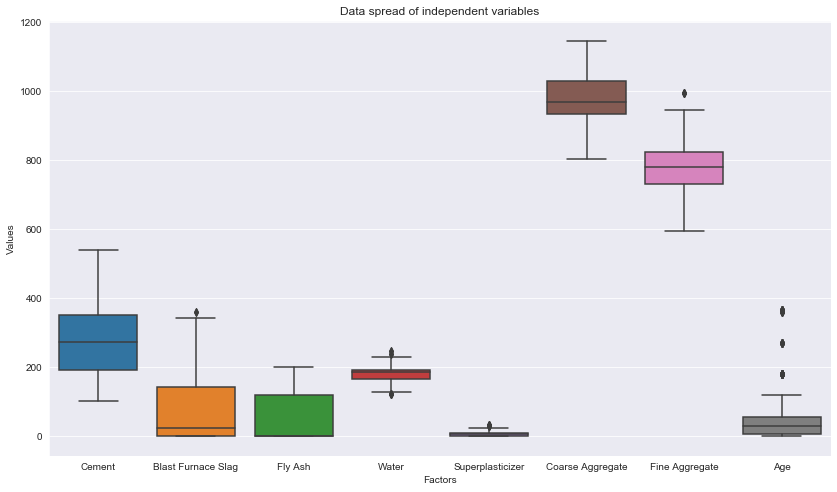

In [8]:
# let's look at the spread of the independent variables
plt.figure(figsize=(14,8))
data2=pd.melt(X,var_name='factors',value_name='values')
p=sns.boxplot(x='factors',y='values',data=data2,)
p.set(xlabel ='Factors',ylabel='Values',title ='Data spread of independent variables')

plt.show()

# Correlation Matrix of the data set

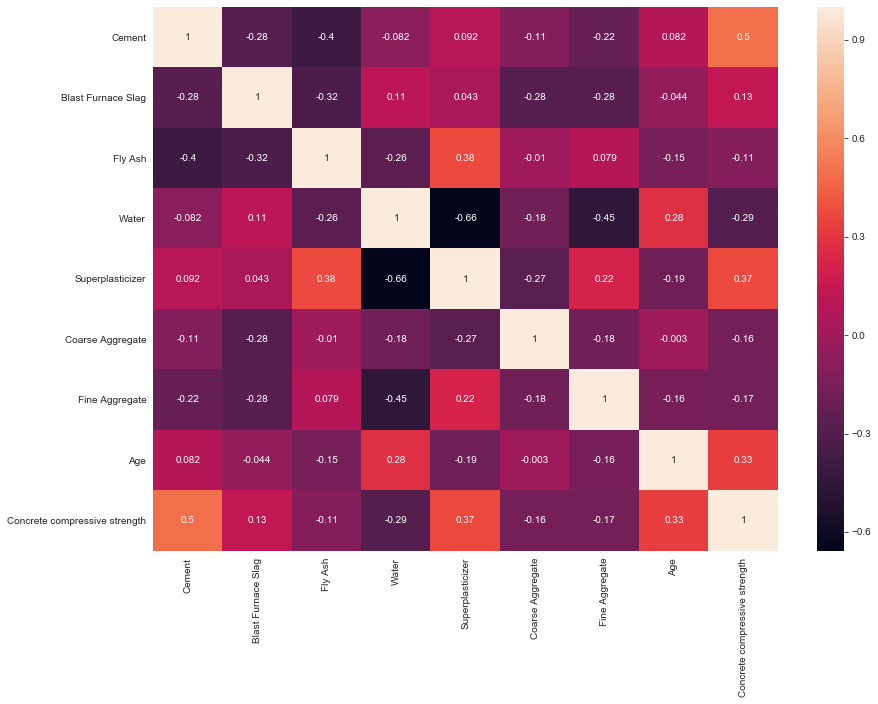

In [9]:
# adjust the width and height of the figure
plt.figure(figsize=(14,10))

# create a heatmap of correlation matrix
correlation_matrix = data_con.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

# Pair Plot of the data set


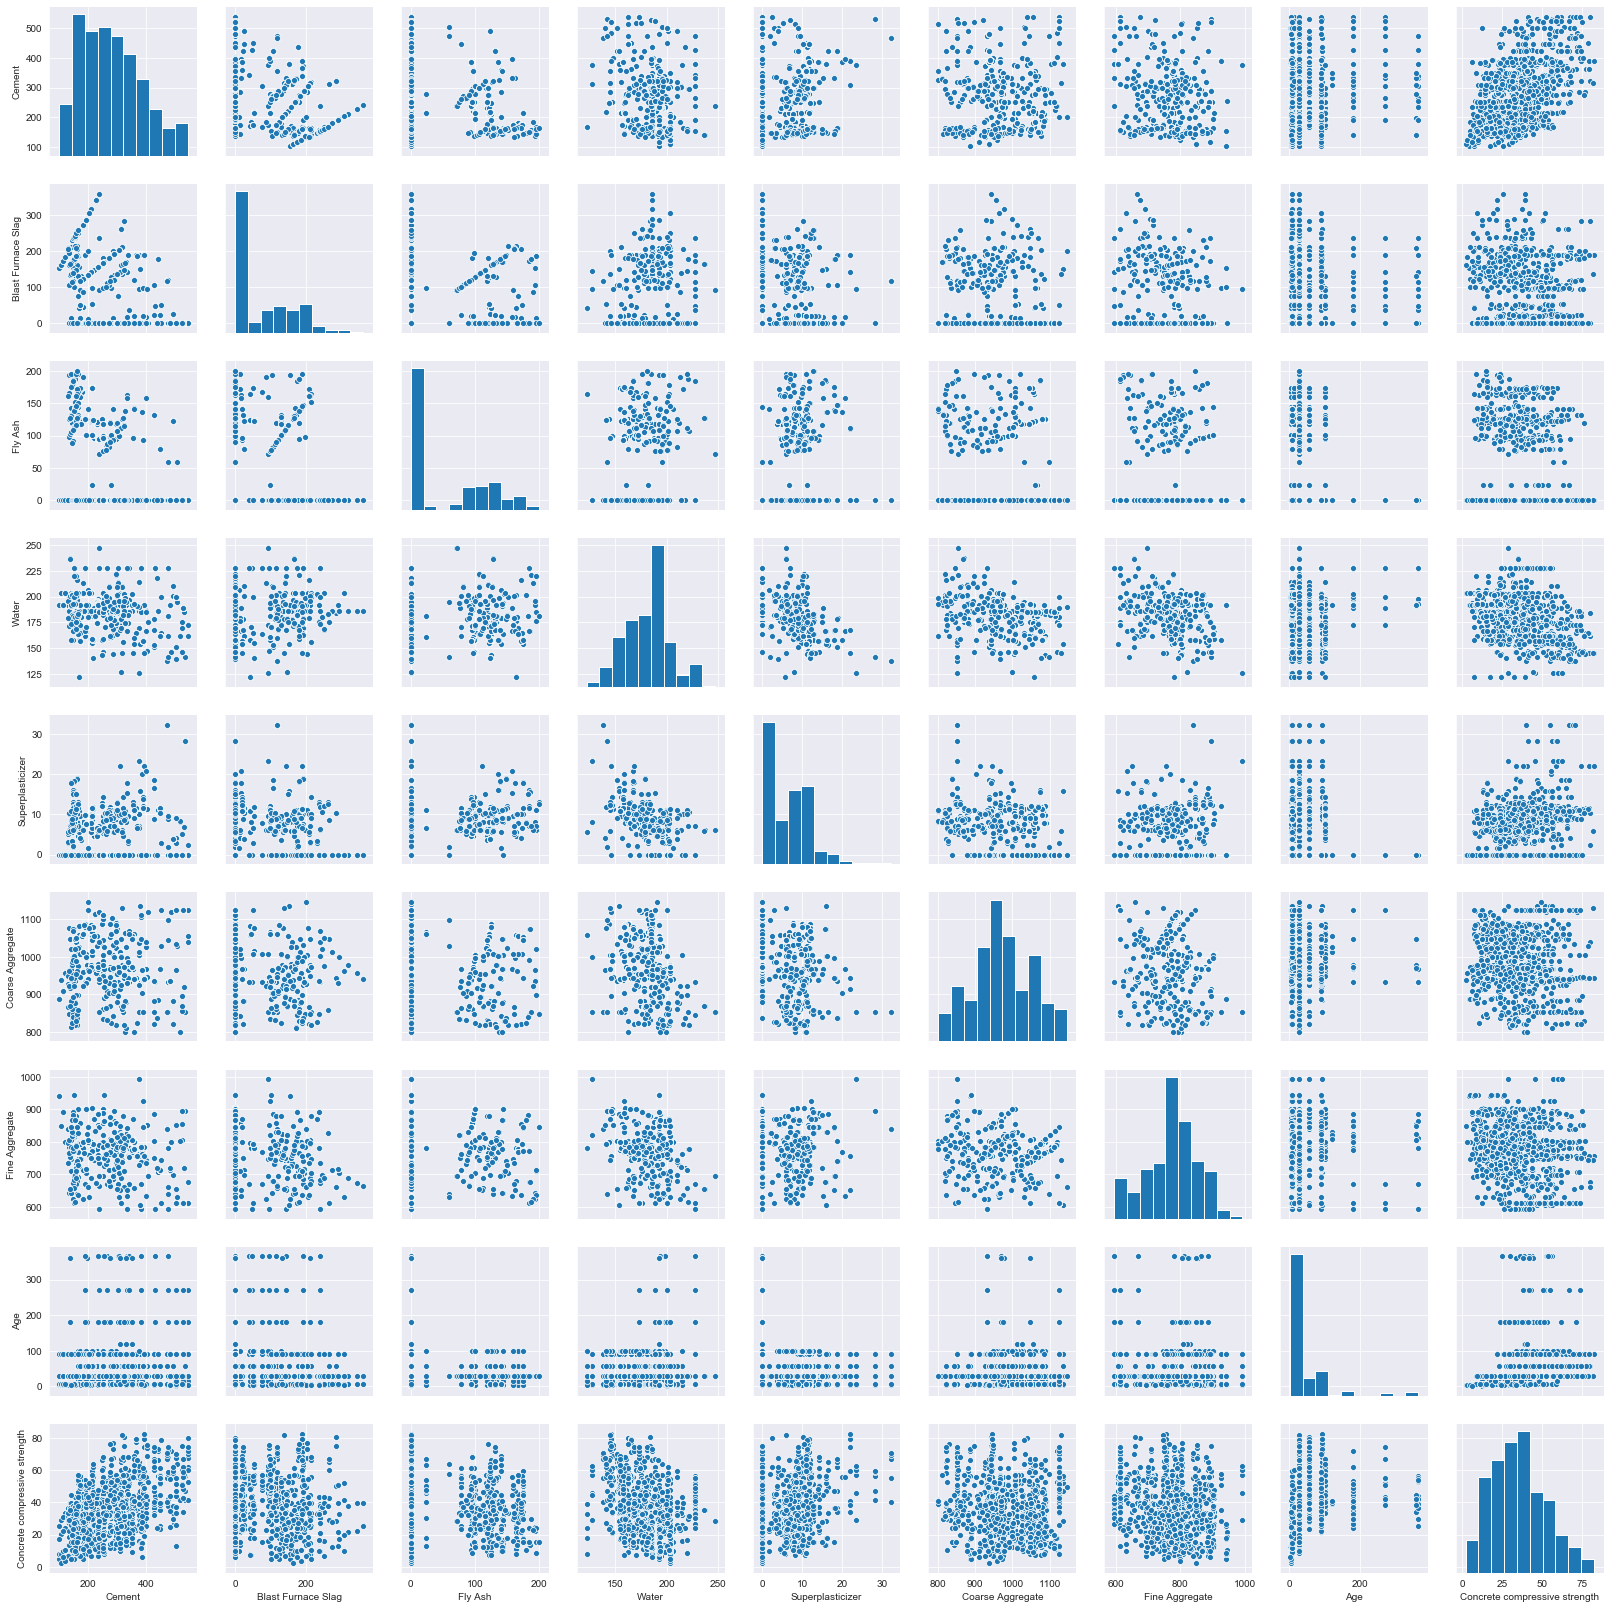

In [10]:
sns.pairplot(data_con)
plt.show()

# Splitting the data into training and test data

In [11]:
# Splitting the data into training and test data
from sklearn.model_selection import train_test_split

# random_state is the seed used by the random number generator
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# build linear regression model using all the features

In [12]:
import statsmodels.api as sm
y_train=y_train.reset_index(drop=True)
x_train = add_constant(x_train)
x_train = x_train.reset_index(drop=True)
#print(x_train.head())
model = sm.OLS(y_train,x_train) # ordinary least squares model
model_fit = model.fit()
print (model_fit.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.632
Model:                                       OLS   Adj. R-squared:                  0.628
Method:                            Least Squares   F-statistic:                     163.7
Date:                           Sat, 14 Sep 2019   Prob (F-statistic):          6.71e-160
Time:                                   02:01:48   Log-Likelihood:                -2888.1
No. Observations:                            772   AIC:                             5794.
Df Residuals:                                763   BIC:                             5836.
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

/Users/nikhilkosare/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Jarque-Bera (JB)
The Jarque-Bera test statistic tests the null that the data is normally distributed against an alternative that the data follow some other distribution. The test statistic is based on two moments of the data, the skewness, and the kurtosis.                                                                                                 

## Skewness
Skewness is a measure of the symmetry in a distribution.  A symmetrical dataset will have a skewness equal to 0.  So, a normal distribution will have a skewness of 0.   Skewness essentially measures the relative size of the two tails.                     
## Kurtosis

Kurtosis is a measure of the combined sizes of the two tails.  It measures the amount of probability in the tails.  The value is often compared to the kurtosis of the normal distribution, which is equal to 3.  If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution (more in the tails).  If the kurtosis is less than 3, then the dataset has lighter tails than a normal distribution (less in the tails). 

## Durbin-Watson

The Hypotheses for the Durbin Watson test are:
H0 = no first order autocorrelation.
H1 = first order correlation exists.

The Durbin Watson test reports a test statistic, with a value from 0 to 4, where:

2 is no autocorrelation.                                                                                              
0 to <2 is positive autocorrelation (common in time series data).                                                      
2 to 4 is negative autocorrelation (less common in time series data).                                                                                                                                                                        
A rule of thumb is that test statistic values in the range of 1.5 to 2.5 are relatively normal.

## Condition Number

This test measures the sensitivity of a function's output as compared to its input. When we have multicollinearity, we can expect much higher fluctuations to small changes in the data, hence, we hope to see a relatively small number.

## Omnibus Test

Checks the normality of the residuals based on kurtosis and skewness. if skewness is close to 0 and kurtosis is close to 3 that means the data is normally distributed

# Perform outlier treatment on independent & dependent variable using box plot

In [13]:
z1=y_train.describe()
z1 = z1.reset_index(drop=True)
#z1 = z['medv']
lim1=len(y_train)
#lim=len(x_train)
twenty_five=z1.iloc[4]
seventy_five=z1.iloc[6]
iqr=seventy_five-twenty_five
max_r=seventy_five+1.5*iqr
min_r=twenty_five-1.5*iqr
#x_train=y_train.describe()
#z1 = z1.reset_index(drop=True)
#z1 = z['lstat']
y_train=y_train.reset_index(drop=True)
#y_train = y_train['medv']
for j in range(0,lim1) :
    if y_train[j]>max_r :
        y_train[j]=max_r
    if y_train[j]<min_r:
        y_train[j]=min_r

In [14]:
IV = x_train.describe()
IV = IV.reset_index(drop=True)
#print(IV.head())
#z1 = z['medv']
limIV = len(x_train)
#print(limIV)
#lim=len(x_train)
x_train=x_train.reset_index(drop=True)
for i in range(0,len(x_train.columns)):
    twenty_five=IV.iloc[4][i]
    seventy_five=IV.iloc[6][i]
    iqr=seventy_five-twenty_five
    max_r=seventy_five+1.5*iqr
    min_r=twenty_five-1.5*iqr
    for j in range(0,limIV):
        #print(x_train.iloc[i,j])
        if x_train.iloc[j,i]>max_r:
            x_train.iloc[j,i]=max_r
        if x_train.iloc[j,i]<min_r:
            x_train.iloc[j,i]=min_r

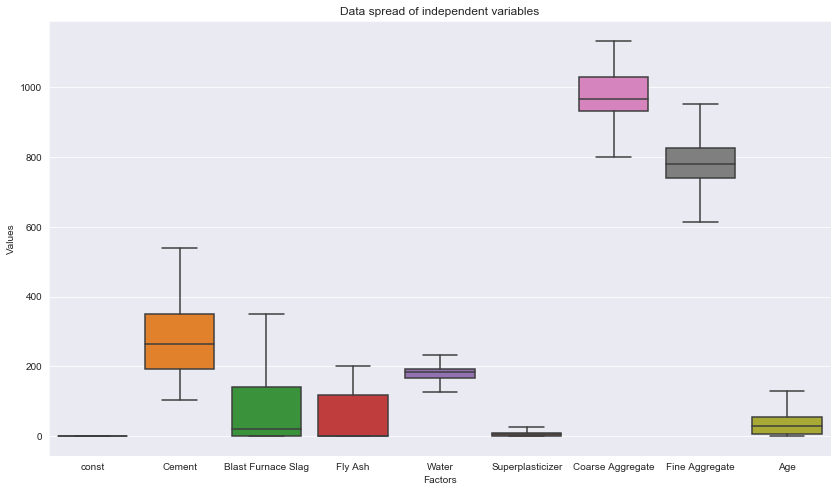

In [15]:
# let's look at the spread after outlier treatment
plt.figure(figsize=(14,8))
data2=pd.melt(x_train,var_name='factors',value_name='values')
p=sns.boxplot(x='factors',y='values',data=data2,)
p.set(xlabel ='Factors',ylabel='Values',title ='Data spread of independent variables')

plt.show()

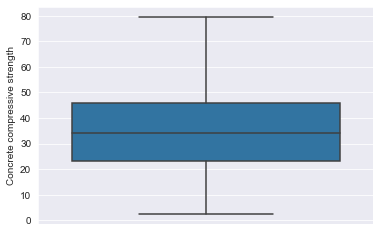

In [16]:
# let's look at the spread of dependent variable after outlier treatment
sns.boxplot(y_train,orient ='v')
plt.show()

In [17]:
# build linear regression model using all the features
import statsmodels.api as sm
y_train=y_train.reset_index(drop=True)
x_train = add_constant(x_train)
x_train = x_train.reset_index(drop=True)
#print(x_train.head())
model = sm.OLS(y_train,x_train) # ordinary least squares model
model_fit = model.fit()
print (model_fit.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.744
Model:                                       OLS   Adj. R-squared:                  0.741
Method:                            Least Squares   F-statistic:                     277.3
Date:                           Sat, 14 Sep 2019   Prob (F-statistic):          5.83e-220
Time:                                   02:02:02   Log-Likelihood:                -2747.2
No. Observations:                            772   AIC:                             5512.
Df Residuals:                                763   BIC:                             5554.
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

/Users/nikhilkosare/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Warnings suggest the issues of multicollinearity.
# lets run the VIF test

## One recommendation is that if VIF is greater than 5, then the explanatory variable given by exog_idx is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.

In [18]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
# extract the columns from the X data set
#syntax -- variance_inflation_factor(exog, exog_idx)
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,15.456717,Cement
1,3.329127,Blast Furnace Slag
2,4.147833,Fly Ash
3,82.157569,Water
4,5.471094,Superplasticizer
5,84.955779,Coarse Aggregate
6,72.790995,Fine Aggregate
7,1.699459,Age


# Perform Backward elimination and run the VIF again

# Exclude "Fine Aggregate" from the model as it has the P value

In [19]:
X1 = data_con[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water','Superplasticizer', 'Coarse Aggregate','Age']]
Y1 = data_con['Concrete compressive strength']

In [20]:
# Splitting the data into training and test data
from sklearn.model_selection import train_test_split
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(X1, Y1, test_size=0.25, random_state=1)

In [21]:
import statsmodels.api as sm
x_train_1 = add_constant(x_train_1)
model_1 = sm.OLS(y_train_1,x_train_1) # ordinary least squares model
model_fit_1 = model_1.fit()
print (model_fit_1.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.630
Model:                                       OLS   Adj. R-squared:                  0.627
Method:                            Least Squares   F-statistic:                     186.1
Date:                           Sat, 14 Sep 2019   Prob (F-statistic):          2.25e-160
Time:                                   02:02:16   Log-Likelihood:                -2889.7
No. Observations:                            772   AIC:                             5795.
Df Residuals:                                764   BIC:                             5833.
Df Model:                                      7                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

# Exclude "Coarse Aggregate" from the model as it has the P value

In [22]:
X2 = data_con[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water','Superplasticizer','Age']]
Y2 = data_con['Concrete compressive strength']

In [23]:
# Splitting the data into training and test data
from sklearn.model_selection import train_test_split
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X2, Y2, test_size=0.25, random_state=1)

In [24]:
import statsmodels.api as sm
x_train_2 = add_constant(x_train_2)
model_2 = sm.OLS(y_train_2,x_train_2) # ordinary least squares model
model_fit_2 = model_2.fit()
print (model_fit_2.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.630
Model:                                       OLS   Adj. R-squared:                  0.627
Method:                            Least Squares   F-statistic:                     217.2
Date:                           Sat, 14 Sep 2019   Prob (F-statistic):          1.84e-161
Time:                                   02:02:21   Log-Likelihood:                -2889.9
No. Observations:                            772   AIC:                             5794.
Df Residuals:                                765   BIC:                             5826.
Df Model:                                      6                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

## All the variables looks significant however warnings suggests the issues of multicollinearity
## let's run the VIF test                                                                                                                          

## One recommendation is that if VIF is greater than 5, then the explanatory variable given by exog_idx is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.

In [25]:
x_train_2 = x_train_2.drop('const',axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train_2.values, i) for i in range(x_train_2.shape[1])]
vif["features"] = x_train_2.columns
vif

,VIF Factor,features
0,13.675456,Cement
1,2.907667,Blast Furnace Slag
2,3.910290,Fly Ash
3,20.629856,Water
4,3.759347,Superplasticizer
5,1.645177,Age


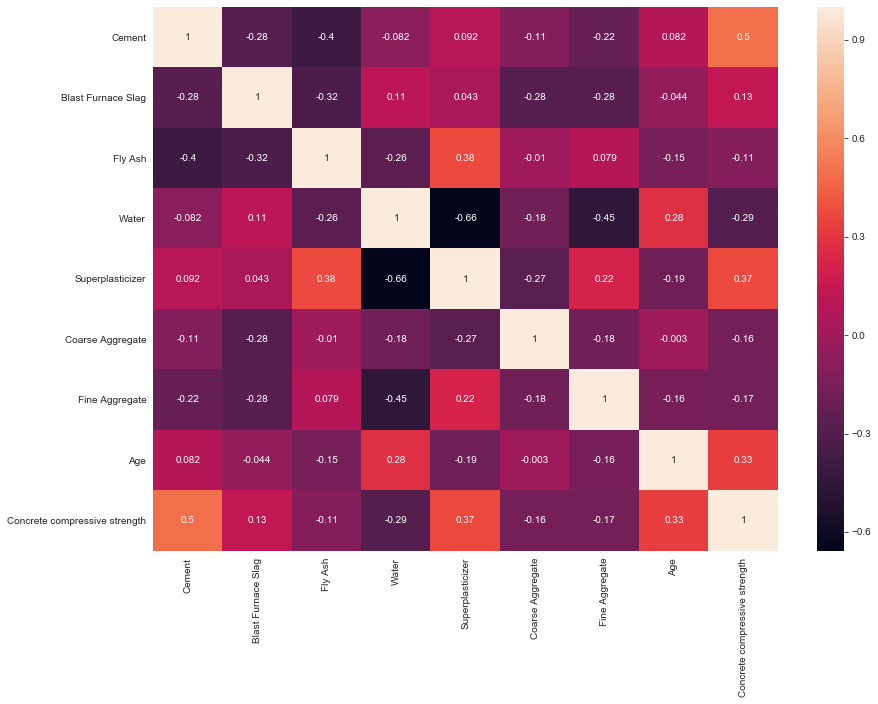

In [26]:
# adjust the width and height of the figure
plt.figure(figsize=(14,10))

# create a heatmap of correlation matrix
correlation_matrix = data_con.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

## Correlation Analysis
## Cement is correlated with Blast Furnance Slage and Fly ash
## Water is correlated with Age and Superplasticizer

# Drop Blast Furnance Slage and Fly ash as it is correlated with Cement

In [27]:
#data1 = data.loc[:,['medv','lstat']]
X3 = data_con[['Cement', 'Water','Superplasticizer','Age']]
Y3 = data_con['Concrete compressive strength']

In [28]:
# Splitting the data into training and test data
from sklearn.model_selection import train_test_split
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(X3, Y3, test_size=0.25, random_state=1)

In [29]:
import statsmodels.api as sm
x_train_3 = add_constant(x_train_3)
#print(x_train.head())
model_3 = sm.OLS(y_train_3,x_train_3) # ordinary least squares model
model_fit_3 = model_3.fit()
print (model_fit_3.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.508
Model:                                       OLS   Adj. R-squared:                  0.505
Method:                            Least Squares   F-statistic:                     197.9
Date:                           Sat, 14 Sep 2019   Prob (F-statistic):          1.62e-116
Time:                                   02:02:31   Log-Likelihood:                -3000.1
No. Observations:                            772   AIC:                             6010.
Df Residuals:                                767   BIC:                             6034.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------

In [30]:
x_train_3 = x_train_3.drop('const',axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif3 = pd.DataFrame()
vif3["VIF Factor"] = [variance_inflation_factor(x_train_3.values, i) for i in range(x_train_3.shape[1])]
vif3["features"] = x_train_3.columns
vif3

,VIF Factor,features
0,7.727606,Cement
1,7.837731,Water
2,1.962385,Superplasticizer
3,1.613890,Age


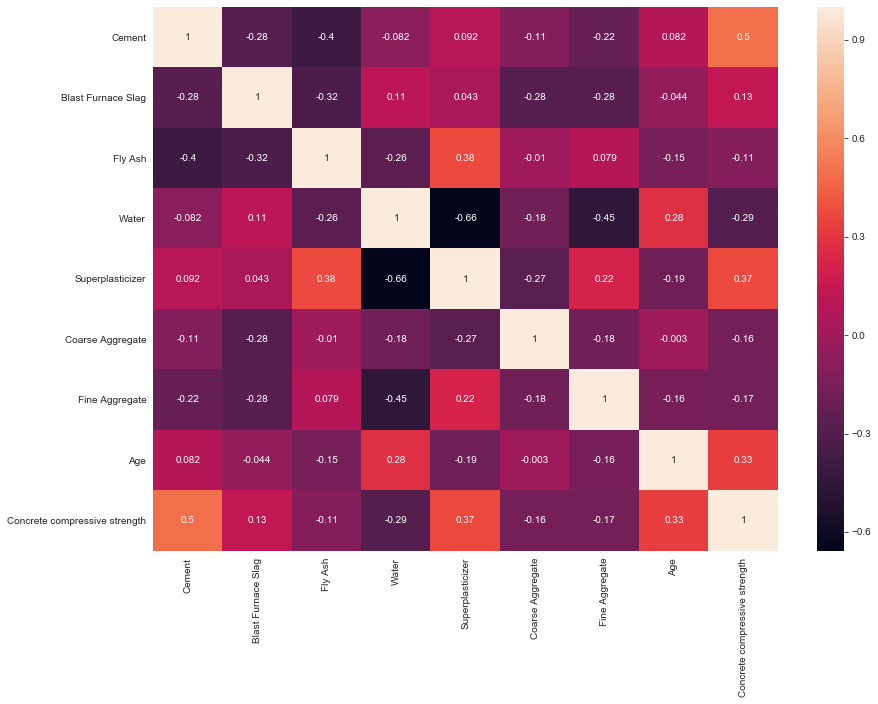

In [31]:
# adjust the width and height of the figure
plt.figure(figsize=(14,10))

# create a heatmap of correlation matrix
correlation_matrix = data_con.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

# there is a correlation between water and Superplasticizer .Superplasticizer has stronger correlation with DV as compared to Water so let's drop Water

In [32]:
#data1 = data.loc[:,['medv','lstat']]
X4 = data_con[['Cement','Superplasticizer','Age']]
Y4 = data_con['Concrete compressive strength']

In [33]:
# Splitting the data into training and test data
from sklearn.model_selection import train_test_split
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(X4, Y4, test_size=0.25, random_state=1)

In [34]:
#x_train_4 = x_train_4.drop('const',axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif3 = pd.DataFrame()
vif3["VIF Factor"] = [variance_inflation_factor(x_train_4.values, i) for i in range(x_train_4.shape[1])]
vif3["features"] = x_train_4.columns
vif3

,VIF Factor,features
0,2.533546,Cement
1,1.935550,Superplasticizer
2,1.482890,Age


## Exclude outliers

In [35]:
IV = x_train_4.describe()
IV = IV.reset_index(drop=True)
#print(IV.head())
#z1 = z['medv']
limIV = len(x_train_4)
#print(limIV)
#lim=len(x_train)
x_train_4=x_train_4.reset_index(drop=True)
for i in range(0,len(x_train_4.columns)):
    twenty_five=IV.iloc[4][i]
    seventy_five=IV.iloc[6][i]
    iqr=seventy_five-twenty_five
    max_r=seventy_five+1.5*iqr
    min_r=twenty_five-1.5*iqr
    for j in range(0,limIV):
        #print(x_train.iloc[i,j])
        if x_train_4.iloc[j,i]>max_r:
            x_train_4.iloc[j,i]=max_r
        if x_train_4.iloc[j,i]<min_r:
            x_train_4.iloc[j,i]=min_r

In [36]:
z1=y_train_4.describe()
z1 = z1.reset_index(drop=True)
#z1 = z['medv']
lim1=len(y_train_4)
#lim=len(x_train)
twenty_five=z1.iloc[4]
seventy_five=z1.iloc[6]
iqr=seventy_five-twenty_five
max_r=seventy_five+1.5*iqr
min_r=twenty_five-1.5*iqr
#x_train=y_train.describe()
#z1 = z1.reset_index(drop=True)
#z1 = z['lstat']
y_train_4=y_train.reset_index(drop=True)
#y_train = y_train['medv']
for j in range(0,lim1) :
    if y_train_4[j]>max_r :
        y_train_4[j]=max_r
    if y_train_4[j]<min_r:
        y_train_4[j]=min_r

In [37]:
import statsmodels.api as sm
x_train_4 = add_constant(x_train_4)
#print(x_train.head())
model_4 = sm.OLS(y_train_4,x_train_4) # ordinary least squares model
model_fit_4 = model_4.fit()
print (model_fit_4.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.607
Model:                                       OLS   Adj. R-squared:                  0.605
Method:                            Least Squares   F-statistic:                     395.1
Date:                           Sat, 14 Sep 2019   Prob (F-statistic):          3.54e-155
Time:                                   02:02:44   Log-Likelihood:                -2913.0
No. Observations:                            772   AIC:                             5834.
Df Residuals:                                768   BIC:                             5852.
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------

In [38]:
def mape(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true)*100)

In [40]:
x_test_4 = add_constant(x_test_4)
print('Mape on train set post treating the outlier is :',mape(y_train_4,model_fit_4.fittedvalues))
ypred_4 = model_fit_4.predict(x_test_4)

print( '******************************************************************')

print('Mape on test set post treating the outlier is :', mape(y_test,ypred_4))

Mape on train set post treating the outlier is : 30.765850160332356
******************************************************************
Mape on test set post treating the outlier is : 33.461822807861274


In [41]:
from sklearn.metrics import mean_absolute_error
print('MAE on Train Set is :',mean_absolute_error(y_train_4, model_fit_4.fittedvalues))

print ('********************************')

print('MAE on Test Set is :',mean_absolute_error(y_test,ypred_4))

MAE on Train Set is : 8.272043277253458
********************************
MAE on Test Set is : 10.65581949521524


In [42]:
from sklearn.metrics import mean_squared_error

print('MAE on Train Set is :',mean_squared_error(y_train_4, model_fit_4.fittedvalues))

print ('********************************')

print('MAE on Test Set is :',mean_squared_error(y_test,ypred_4))

MAE on Train Set is : 110.8998414776844
********************************
MAE on Test Set is : 249.811692819835


## Diagnostic Plots

In [43]:
# fitted values 
model_fitted_y = model_fit_4.fittedvalues

# model residuals
model_residuals = model_fit_4.resid

# normalized residuals
model_norm_residuals = model_fit_4.get_influence().resid_studentized_internal

# absolute square root of normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit_4.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit_4.get_influence().cooks_distance[0]

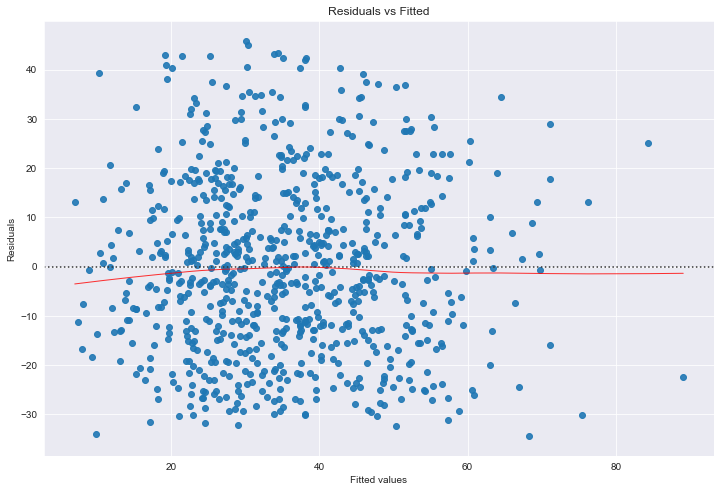

In [44]:
plt.figure(figsize=(12,8))
a= sns.residplot(model_fitted_y, 'Concrete compressive strength', data=data_con.iloc[x_train_4.index,:], 
                          lowess=True, 
                          scatter_kws={'alpha': 0.9}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},)

a.set_title('Residuals vs Fitted')
a.set_xlabel('Fitted values')
a.set_ylabel('Residuals')
plt.show()

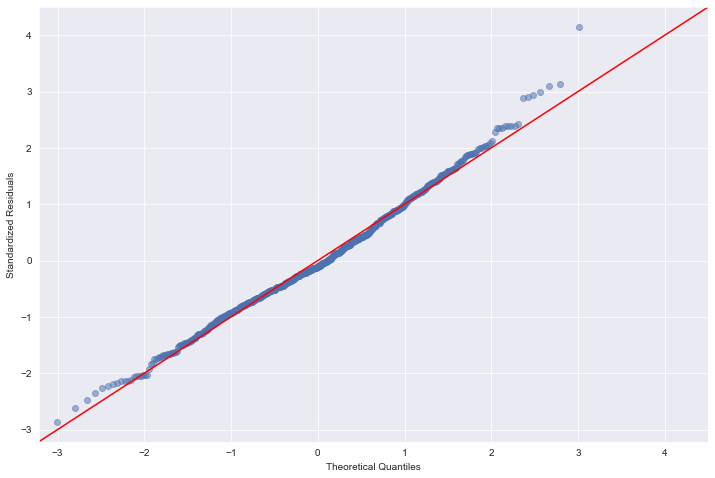

In [45]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1,xlabel='Theoretical Quantiles',
                     ylabel='Standardized Residuals')

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)


# store the diagnostic information as data frame

In [46]:
infl=model_fit_4.get_influence()
influential_df=infl.summary_frame().filter(["hat_diag","student_resid","cooks_d"])

In [47]:
influential_df.head()

,hat_diag,student_resid,cooks_d
0,0.004360,0.333405,0.000122
1,0.004284,-2.034260,0.004433
2,0.006020,0.745864,0.000843
3,0.013398,-1.709173,0.009893
4,0.001999,-0.212118,0.000023


In [48]:
#influential_df[influential_df['hat_diag']> 2* np.mean(influential_df['hat_diag'])]

In [49]:
influential_df.sort_values('cooks_d',ascending=False).head()

,hat_diag,student_resid,cooks_d
413,0.026551,-2.880897,0.056061
486,0.023028,-2.628312,0.040396
218,0.022839,-2.175767,0.027528
120,0.020061,-2.276983,0.026391
40,0.015022,-2.487984,0.023442


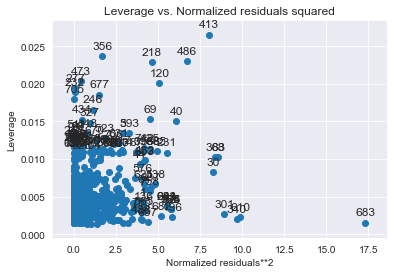

In [50]:
from statsmodels.graphics.regressionplots import *
from statsmodels.graphics import utils
plot_leverage_resid2(model_fit_4)
plt.show()

In [51]:
y_train_5=y_train_4.drop([413],axis=0)
x_train_5 = x_train_4.drop([413],axis=0)

In [52]:
import statsmodels.api as sm
x_train_5 = add_constant(x_train_5)
#print(x_train.head())
model_5 = sm.OLS(y_train_5,x_train_5) # ordinary least squares model
model_fit_5 = model_4.fit()
print (model_fit_5.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.607
Model:                                       OLS   Adj. R-squared:                  0.605
Method:                            Least Squares   F-statistic:                     395.1
Date:                           Sat, 14 Sep 2019   Prob (F-statistic):          3.54e-155
Time:                                   02:03:20   Log-Likelihood:                -2913.0
No. Observations:                            772   AIC:                             5834.
Df Residuals:                                768   BIC:                             5852.
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------

/Users/nikhilkosare/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
